In [1]:
import numpy as np 
np.random.seed(1234)
import itertools
import functools
from tqdm import tqdm 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

* for binary feature use bernoulli dist 
* for categorical feature use categorical dist 
* for continuous feature use gaussian dist 
* for x is count vector and sum of x represent the length of the object use multinomial dist 

# Bernoulli NB : 

In [2]:
from BernoulliNB import BernoulliNB

In [3]:
def fit (X, y) : 
    n_samples, n_features = X.shape 
    class_count = np.unique(y)
    n_classes = len(class_count)

    w = np.zeros((n_classes, n_features), dtype = np.float64)
    w_priors = np.zeros(n_classes, dtype = np.float64)

    for c in tqdm(range(n_classes), colour = 'CYAN') : 
        X_c = X[y == c]

        w[c, :] = np.sum(X_c, axis = 0)/X_c.shape[0]

        w_priors[c] = X_c.shape[0]/float(n_samples)

    print('weight vector: ', w)
    print('prior: ', w_priors)
    return w, w_priors

In [4]:
X = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
y = np.array([1, 0, 0, 1])
fit(X, y)

100%|██████████| 2/2 [00:00<?, ?it/s]

weight vector:  [[0. 1.]
 [1. 0.]]
prior:  [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]),
 array([0.5, 0.5]))

In [5]:
X_c = X[y == 1]; X_c

array([[1, 0],
       [1, 0]])

In [6]:
np.sum(X_c, axis = 0)

array([2, 0])

In [7]:
w = np.sum(X_c, axis = 0)/X_c.shape[0]
w

array([1., 0.])

In [8]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)

100%|██████████| 2/2 [00:00<?, ?it/s]

class conditional density:  [[0.25 0.75]
 [0.75 0.25]]
prior:  [0.5 0.5]


In [9]:
bernoulli_nb.predict(X)

array([1, 0, 0, 1], dtype=int64)

* for the 1st example higher value for class label 1 --> 1 
* for the 2nd example higher value for class label 0 --> 0

In [10]:
bernoulli_nb.log_likelihood_prior_prob(X)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

In [11]:
bernoulli_nb.predict_probs(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

## Multiclass :

In [12]:
X = np.array([[1, 0], [0, 1], [0, 1], [1, 0], [1, 1], [1, 1]])
y = np.array([1, 0, 0, 1, 2, 2])

In [13]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)

100%|██████████| 3/3 [00:00<00:00, 3026.19it/s]

class conditional density:  [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
prior:  [0.33333333 0.33333333 0.33333333]


In [14]:
bernoulli_nb.predict(X)

array([1, 0, 0, 1, 2, 2], dtype=int64)

In [15]:
bernoulli_nb.predict_probs(X)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

# Gaussian NB : 

In [16]:
from GaussianNB import GaussianNB

In [17]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split 

X, y = make_blobs(
    n_samples = 100, 
    n_features = 2, 
    centers = [[5, 5], [10, 10]], 
    cluster_std = 1.5, 
    random_state = 2
)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

2it [00:00, ?it/s]

Mean:  [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance:  [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Priors:  [0.5125 0.4875]


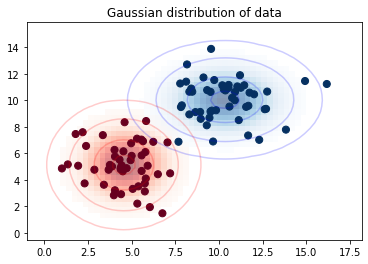

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

xlim = (min(X[:, 0]) - 2, max(X[:, 0]) + 2 )
ylim = (min(X[:, 1]) - 2, max(X[:, 1]) + 2 )

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu)**2 / std**2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape), levels=[0.01, 0.1, 0.5, 0.9], colors = color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

plt.title('Gaussian distribution of data')
plt.show()

In [20]:
gnb.predict(x_test)

20it [00:00, 1929.35it/s]


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [21]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, gnb.predict(x_test)))

20it [00:00, 2506.23it/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [22]:
gnb.predict_proba(x_test)

20it [00:00, 2720.75it/s]


array([[9.99999746e-01, 2.54140753e-07],
       [7.63749214e-14, 1.00000000e+00],
       [4.23038642e-03, 9.95769614e-01],
       [9.99986614e-01, 1.33855473e-05],
       [7.05769182e-06, 9.99992942e-01],
       [9.99820566e-01, 1.79433743e-04],
       [9.72541524e-01, 2.74584756e-02],
       [9.99982043e-01, 1.79572091e-05],
       [2.85910189e-05, 9.99971409e-01],
       [1.01888837e-07, 9.99999898e-01],
       [7.39129058e-01, 2.60870942e-01],
       [9.99793438e-01, 2.06561658e-04],
       [9.99999915e-01, 8.46737165e-08],
       [2.03213294e-05, 9.99979679e-01],
       [8.76198350e-09, 9.99999991e-01],
       [6.51163513e-05, 9.99934884e-01],
       [9.27638525e-05, 9.99907236e-01],
       [7.58034673e-09, 9.99999992e-01],
       [1.81773339e-03, 9.98182267e-01],
       [9.99985544e-01, 1.44557945e-05]])

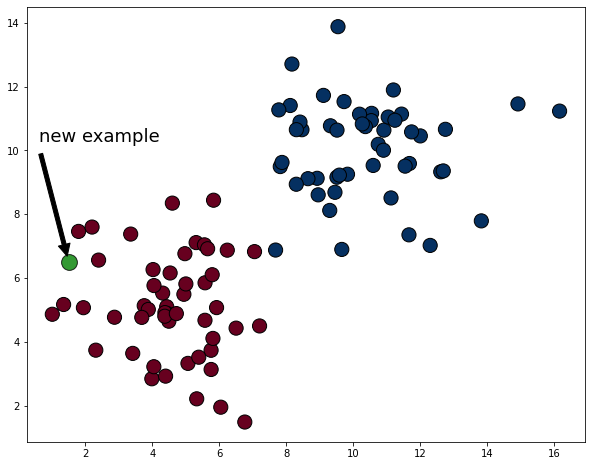

In [23]:
x_new = np.array([1.5, 6.5])


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c= y, s = 200, edgecolors='k', cmap = 'RdBu')

plt.scatter(x_new[0], x_new[1], marker= 'o', c='green', s=250, edgecolors='k', alpha= 0.8)
plt.annotate(
    'new example', xy = x_new, xytext = (-30, 120), 
    textcoords = 'offset points', 
    arrowprops = dict(facecolor = 'black', shrink = 0.05), fontsize = 18)

plt.show()

In [24]:
gnb.predict_proba(np.array([x_new]))

1it [00:00, 1000.55it/s]


array([[9.99996296e-01, 3.70449944e-06]])

## Multiclass

In [25]:
X, y = make_blobs(n_samples = 100,
                    n_features =2,
                    centers = [[5,5], [10,10], [20,20]],
                    cluster_std = 1.5,
                    random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
gaussian_nb_mc = GaussianNB()
gaussian_nb_mc.fit(X_train, y_train)

3it [00:00, ?it/s]

Mean:  [[ 4.94844927  4.67947138]
 [ 9.62097704 10.49990402]
 [19.63832097 19.94706375]]
Variance:  [[1.99332345 2.36976247]
 [1.68415535 2.25596351]
 [1.79203315 1.24939267]]
Priors:  [0.3375 0.35   0.3125]


In [27]:
print(classification_report(y_test, gaussian_nb_mc.predict(X_test)))

20it [00:00, 1645.86it/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [28]:
gaussian_nb_mc.predict_proba(X_test)

20it [00:00, 1669.74it/s]


array([[1.02996770e-47, 2.67740135e-24, 1.00000000e+00],
       [5.00111567e-05, 9.99949989e-01, 6.51529293e-32],
       [9.99999999e-01, 9.45325297e-10, 1.33290144e-78],
       [1.00000000e+00, 6.49743430e-12, 7.70260328e-90],
       [1.50617094e-52, 5.94123831e-27, 1.00000000e+00],
       [3.77917160e-47, 9.99218112e-23, 1.00000000e+00],
       [5.30598294e-33, 9.05195020e-13, 1.00000000e+00],
       [6.63950534e-07, 9.99999336e-01, 1.42699786e-26],
       [3.57244754e-61, 3.86494439e-34, 1.00000000e+00],
       [9.70872284e-06, 9.99990291e-01, 5.02104511e-31],
       [9.99982252e-01, 1.77477098e-05, 2.51366893e-63],
       [3.93493321e-39, 5.51495730e-18, 1.00000000e+00],
       [1.00000000e+00, 4.72574372e-11, 1.19906531e-79],
       [1.19575291e-47, 3.45203067e-24, 1.00000000e+00],
       [9.09245241e-01, 9.07547595e-02, 1.30885257e-46],
       [9.99999997e-01, 2.64110663e-09, 3.37901343e-80],
       [9.97572472e-01, 2.42752753e-03, 1.17514148e-55],
       [1.12896485e-05, 9.99988

## Multinomial NB : 

In [29]:
from MultinomialNB import MultinomialNB

In [30]:
rng = np.random.RandomState(1)
X = rng.randint(5, size = (1000, 5))
y = rng.randint(2, size = (1000, ))

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [31]:
print(x_train.shape)
print(y_train.shape)

(750, 5)
(750,)


In [32]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)

print('prior : ', multinomial_nb.w_priors)
print('parameters of multinomial dist : ', multinomial_nb.w)

2it [00:00, 2011.66it/s]

prior :  [0.48670213 0.51329787]
parameters of multinomial dist :  [[0.21505674 0.18959314 0.18903958 0.19402159 0.21228896]
 [0.20939734 0.19662921 0.19867211 0.19765066 0.19765066]]


bad results due to random label assignment in the synthetic data 

In [33]:
print(classification_report(y_test, multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.36      0.44       120
           1       0.55      0.74      0.63       130

    accuracy                           0.56       250
   macro avg       0.56      0.55      0.54       250
weighted avg       0.56      0.56      0.54       250



In [34]:
multinomial_nb.predict_proba(x_test[:5])

array([[0.50447923, 0.49552077],
       [0.46840293, 0.53159707],
       [0.46586549, 0.53413451],
       [0.47863674, 0.52136326],
       [0.41676981, 0.58323019]])

### Multiclass 

In [35]:
rng = np.random.RandomState(1)
X = rng.randint(5, size = (1000, 5))
y = rng.randint(3, size = (1000, ))

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [36]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)

print('prior : ', multinomial_nb.w_priors)
print('parameters of multinomial dist : ', multinomial_nb.w)

3it [00:00, ?it/s]

prior :  [0.34528552 0.3373174  0.31739708]
parameters of multinomial dist :  [[0.2078758  0.19386596 0.19386596 0.204468   0.19992427]
 [0.21811024 0.18503937 0.2015748  0.18700787 0.20826772]
 [0.20880033 0.19676214 0.18887505 0.20257368 0.20298879]]


In [37]:
print(classification_report(y_test, multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.34      0.55      0.42        88
           1       0.32      0.37      0.34        89
           2       0.17      0.01      0.03        73

    accuracy                           0.33       250
   macro avg       0.28      0.31      0.26       250
weighted avg       0.28      0.33      0.28       250



based on the prob you can say that 
* example 1 will be assigned to class 1
* example 2 will be assigned to class 1
* example 3 will be assigned to class 2

In [38]:
multinomial_nb.predict_proba(x_test[:5])

array([[0.34613294, 0.33342303, 0.32044403],
       [0.37027112, 0.29079745, 0.33893143],
       [0.33544186, 0.34800064, 0.3165575 ],
       [0.39306283, 0.24154715, 0.36539002],
       [0.31160012, 0.37669558, 0.3117043 ]])